In [290]:
import numpy as np
import matplotlib.pyplot as plt

In [291]:
class Charges:
  def __init__(self, NUMBER_OF_CHARGES):
    self.charges = np.random.rand(2, NUMBER_OF_CHARGES)
    self.charges *= 2
    self.charges -= 1
    for i in range(NUMBER_OF_CHARGES):
      while(True):
        if self.charges[0,i] ** 2 +self.charges[1,i] ** 2 >1:
          self.charges[0,i] = np.random.random() * 2 -1
          self.charges[1,i] = np.random.random() * 2 -1
        else:
          break
    self.NUMBER_OF_CHARGES = NUMBER_OF_CHARGES

  def __str__(self):
    return f'Number of charges: {self.NUMBER_OF_CHARGES}'

In [292]:
class Annealer:
  def __init__(self, NUMBER_OF_CHARGES, initial_temperature, final_temperature,
               cooling_ratio, monte_carlo_steps, change_epsilon):
    self.NUMBER_OF_CHARGES = NUMBER_OF_CHARGES
    self.charges = Charges(NUMBER_OF_CHARGES)
    self.initial_temperature = initial_temperature
    self.final_temperature = final_temperature
    self.cooling_ratio = cooling_ratio
    self.monte_carlo_steps = monte_carlo_steps
    self.config_gen = Configuration_Generator(self.charges, initial_temperature, change_epsilon)
    self.energies = []
  
  def freeze(self):
    current_temperature = self.initial_temperature
    while current_temperature > self.final_temperature:
      self.config_gen.set_temperature(current_temperature)
      for i in range(self.monte_carlo_steps):
        self.config_gen.generate_new_config()
      current_temperature *= self.cooling_ratio
      self.energies.append(self.config_gen.compute_energy())
#       print(current_temperature)
#       self.plot_charges()

  def plot_charges(self):
      plt.scatter(self.charges.charges[0,:], self.charges.charges[1,:], c='r')
      x = np.cos(np.arange(0,1.01,0.01) * 2 * np.pi)
      y = np.sin(np.arange(0,1.01,0.01) * 2 * np.pi)
      plt.plot(x, y)
      plt.axis('equal')
      plt.show()
      
  def __str__(self):
    return f'Energy of the system: {self.config_gen.compute_energy()}'

In [293]:
class Configuration_Generator:
  def __init__(self, charges, temperature, change_epsilon):
    self.charges = charges
    self.temperature = temperature
    self.change_epsilon = change_epsilon
    
  def set_temperature(self, temperature):
    self.temperature = temperature
    
  def interaction_energy(self, id_a, id_b):
    return np.power(np.power(self.charges.charges[:,id_a] - self.charges.charges[:,id_b], 2).sum(), -0.5)
  
  def compute_energy(self):
    total_energy = 0.0
    for charge_a_id in range(self.charges.NUMBER_OF_CHARGES):
      for charge_b_id in range(self.charges.NUMBER_OF_CHARGES):
        if charge_a_id == charge_b_id:
          continue
        total_energy += self.interaction_energy(charge_a_id, charge_b_id)
    total_energy *= 0.5
    return total_energy
  
  def generate_new_config(self):
    for i in range(self.charges.NUMBER_OF_CHARGES):
      charge_id = np.random.randint(self.charges.NUMBER_OF_CHARGES)
      old = self.charges.charges[:, charge_id]
      old_energy = self.compute_energy()
      # Move it inside the boundaries
      while True:
        temp_coords = self.charges.charges[:, charge_id] + self.change_epsilon * (2 * np.random.random(size=(2)) -1)
        if np.sqrt(np.power(temp_coords, 2).sum()) <= 1:
          self.charges.charges[:, charge_id] = temp_coords
          break
      # Compute energy difference
      new_energy = self.compute_energy()
      energy_dif = new_energy - old_energy
      # Accept if it is lower than 0, otherwise accept with probability exp(-E/T), else leave unchanged
      if energy_dif < 0 or np.random.random() < np.exp(-energy_dif / self.temperature):
        return
      else:
        self.charges.charges[:, charge_id] = old 

Energy of the system: 111.65313535150153


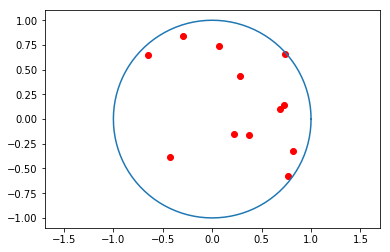

In [296]:
an = Annealer(12, 0.5, 10**-4, 0.9, 200, 0.05)
print(an)
an.plot_charges()

In [ ]:
an.freeze()

In [ ]:
plt.plot(range(len(an.energies)), an.energies)
plt.show()

In [ ]:
print(an)

In [ ]:
an.plot_charges()